In [1]:
from scipy.optimize import Bounds, NonlinearConstraint
from algorithms import Projector, GD, GDA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    x1, x2 = x
    return (x1**2 + x2**2 + 3.0) / (1.0 + 2.0*x1 + 8.0*x2)


def g_fun(x):
    x1, x2 = x
    return x1**2 + 2.0*x1*x2

In [3]:
bounds = Bounds([0.0, 0.0], [np.inf, np.inf])

constraint = NonlinearConstraint(
    g_fun,
    lb=4.0,
    ub=np.inf
)

projector = Projector(bounds=bounds, constraints=[constraint])

In [4]:
x0s = [np.array([1.0, 2.0]), np.array([2.0, 0.8]), np.array([1.5, 1.8])]

In [5]:
labels = [
    r"$x^0 = (1.0,\,2.0)$",
    r"$x^0 = (2.0,\,0.8)$",
    r"$x^0 = (1.5,\,1.8)$",
]

In [6]:
def run_gd(x0, step_size):
    gd = GD(
        function=f,
        projector=projector
    )
    return gd.solve(x0=x0, step_size=step_size, max_iter=3000)

In [7]:
def run_gda(x0, lambda_0, sigma, kappa):
    gda = GDA(
        function=f,
        projector=projector,
    )
    return gda.solve(x0=x0, lambda_0=lambda_0, max_iter=3000, sigma=sigma, kappa=kappa)

In [8]:
def plot_all(title, results):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    fun_lines = []

    for run_idx, result in enumerate(results):
        xs = np.array(result.history)
        xs_plot = xs
        t = np.arange(len(xs_plot))

        x_init = xs_plot[0]
        x_last = xs_plot[-1]

        fun_lines.append(rf"Run {run_idx+1}: $f^*={result.fun_opt:.6g}$")

        plt.plot(
            t,
            xs_plot[:, 0],
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_1^0={x_init[0]:.4g}$, $x_1^*={x_last[0]:.4g}$"
        )
        plt.plot(
            t,
            xs_plot[:, 1],
            linestyle="--",
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_2^0={x_init[1]:.4g}$, $x_2^*={x_last[1]:.4g}$"
        )

        plt.scatter(t[-1], xs_plot[-1, 0], color='red', s=100, zorder=5)  # x1 ending point
        plt.scatter(t[-1], xs_plot[-1, 1], color='blue', s=100, zorder=5)  # x2 ending point

    ax.text(
        0.02,
        0.98,
        "\n".join(fun_lines),
        transform=ax.transAxes,
        va="top",
        ha="left",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
    )

    plt.xlabel("Iteration $t$")
    plt.ylabel(r"$x(t)$")
    plt.legend()
    plt.title(title)
    plt.show()

# GD LR=0.05

In [9]:
results_gd_0 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0=x0, step_size=0.05)
    results_gd_0.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [1. 2.]
x = [0.89168379 1.79711304]
f(x) = 0.4093592050124761
Iterations = 1669

--- Run 2 ---
Initial point: [2.  0.8]
x = [0.89168669 1.7971043 ]
f(x) = 0.4093592053007686
Iterations = 1867

--- Run 3 ---
Initial point: [1.5 1.8]
x = [0.89168669 1.79710431]
f(x) = 0.4093592053019322
Iterations = 1600


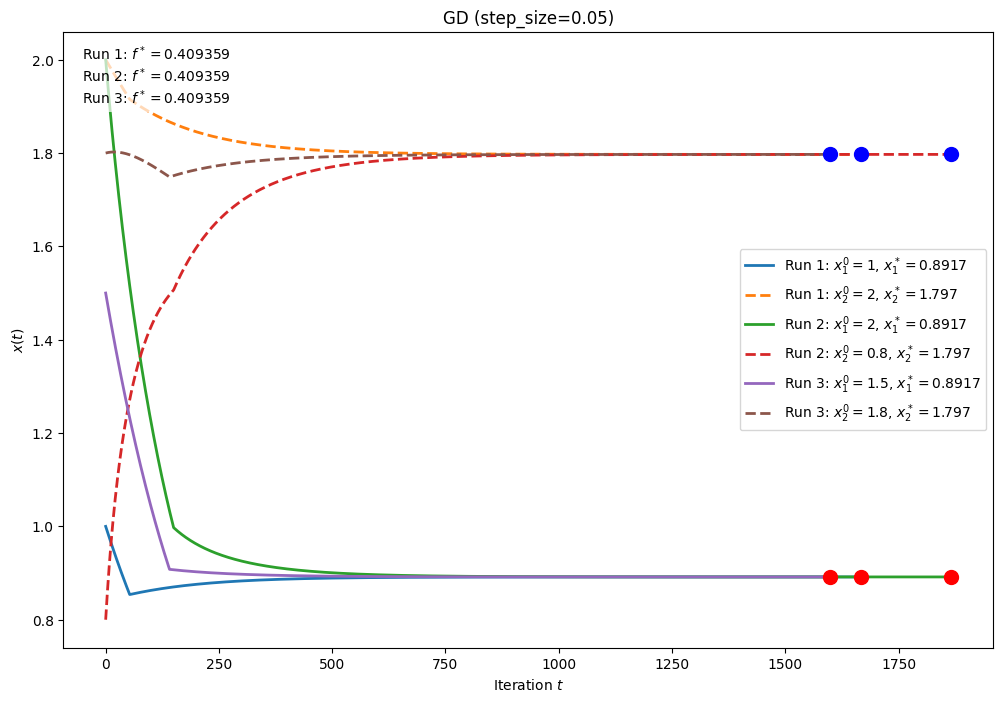

In [10]:
plot_all("GD (step_size=0.05)", results_gd_0)

# GD LR=0.1

In [11]:
results_gd_1 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0, step_size=0.1)
    results_gd_1.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [1. 2.]
x = [0.89176819 1.79688064]
f(x) = 0.409359628170977
Iterations = 888

--- Run 2 ---
Initial point: [2.  0.8]
x = [0.89176962 1.79687633]
f(x) = 0.4093596284578798
Iterations = 986

--- Run 3 ---
Initial point: [1.5 1.8]
x = [0.89176963 1.79687631]
f(x) = 0.4093596284578834
Iterations = 852


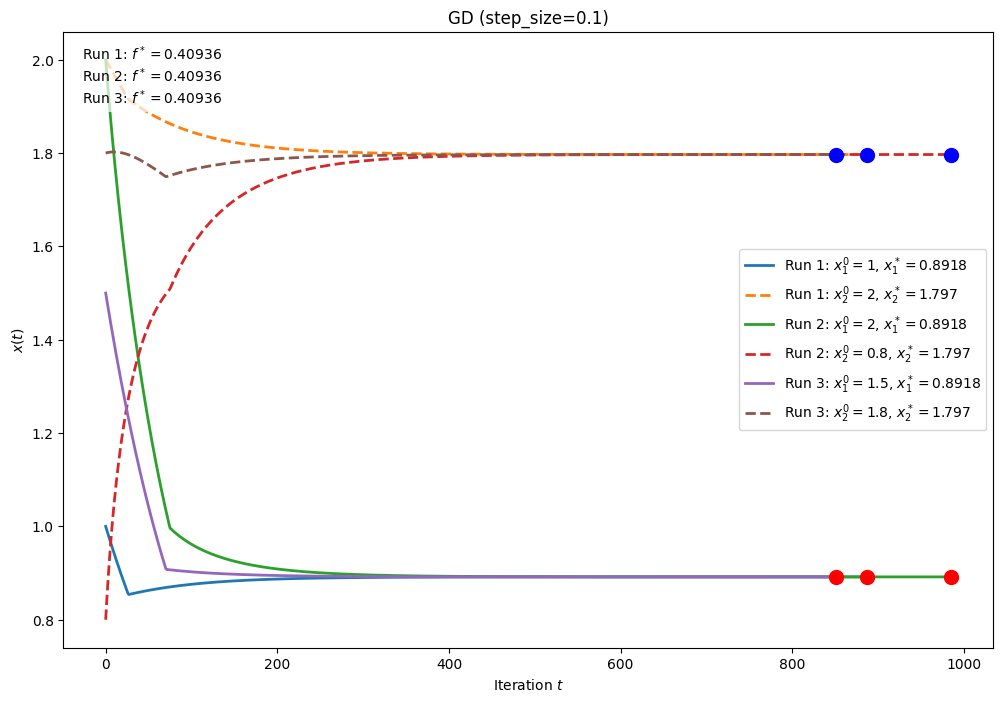

In [12]:
plot_all("GD (step_size=0.1)", results_gd_1)

# GD LR=0.2

In [13]:
results_gd_2 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0, step_size=0.2)
    results_gd_2.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [1. 2.]
x = [0.89194888 1.79642427]
f(x) = 0.4093613209492126
Iterations = 470

--- Run 2 ---
Initial point: [2.  0.8]
x = [0.89194959 1.79642214]
f(x) = 0.4093613212321639
Iterations = 517

--- Run 3 ---
Initial point: [1.5 1.8]
x = [0.89194958 1.79642215]
f(x) = 0.4093613212333241
Iterations = 451


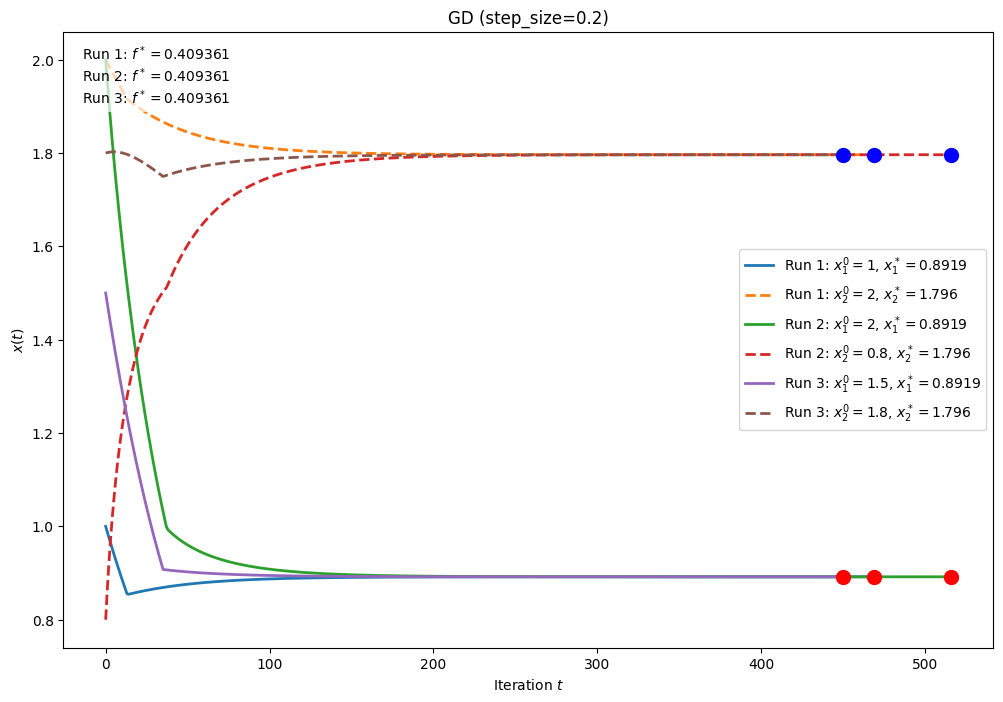

In [14]:
plot_all("GD (step_size=0.2)", results_gd_2)

# GDA

In [15]:
results_gda = []
print("===== GDA results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gda(x0, 1.0, 0.1, 0.5) 
    results_gda.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x* =", result.x_opt)
    print("f(x*) =", result.fun_opt)
    print("Total iterations =", len(result.history))

===== GDA results for Example 1 =====

--- Run 1 ---
Initial point: [1. 2.]
x* = [0.89160919 1.79733082]
f(x*) = 0.40935906745977974
Total iterations = 208

--- Run 2 ---
Initial point: [2.  0.8]
x* = [0.89160954 1.79732979]
f(x*) = 0.40935906746156414
Total iterations = 104

--- Run 3 ---
Initial point: [1.5 1.8]
x* = [0.89160956 1.79732973]
f(x*) = 0.40935906746152223
Total iterations = 75


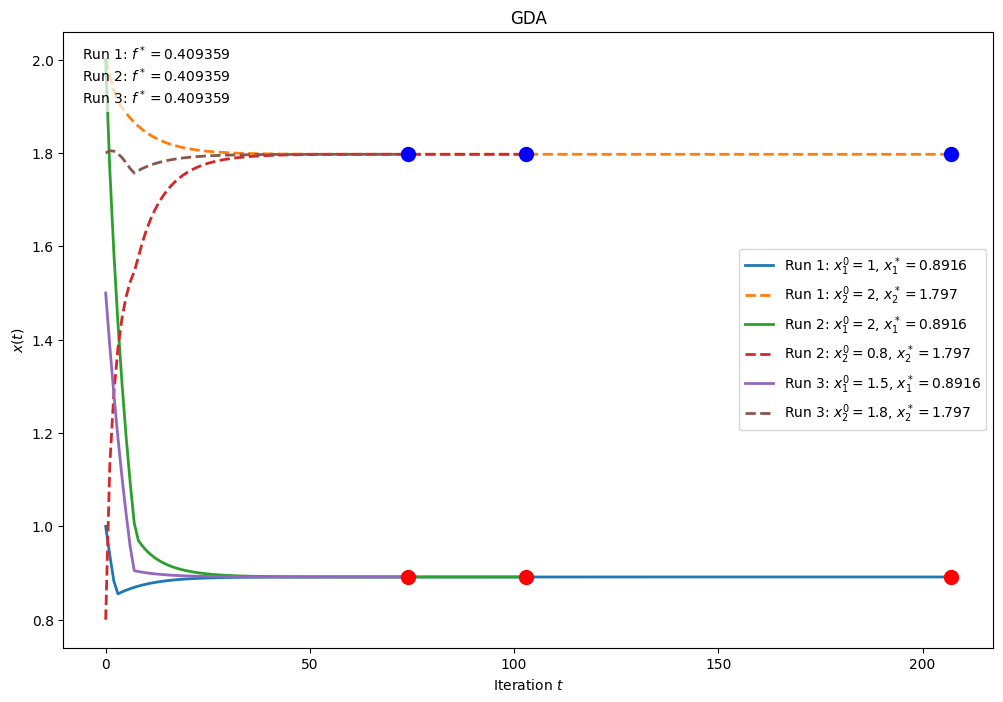

In [16]:
plot_all("GDA", results_gda)